<a href="https://colab.research.google.com/github/Jurgo001/TH_TriTueNhanTao/blob/main/Buoi05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nhập Số Cụm (K): 2


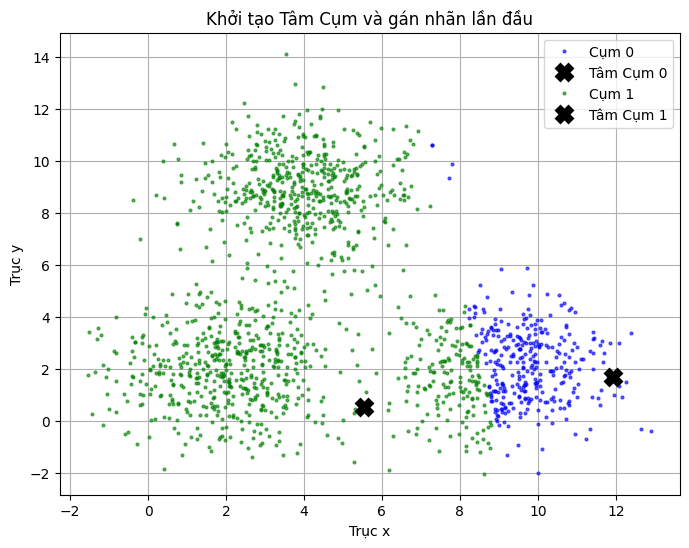

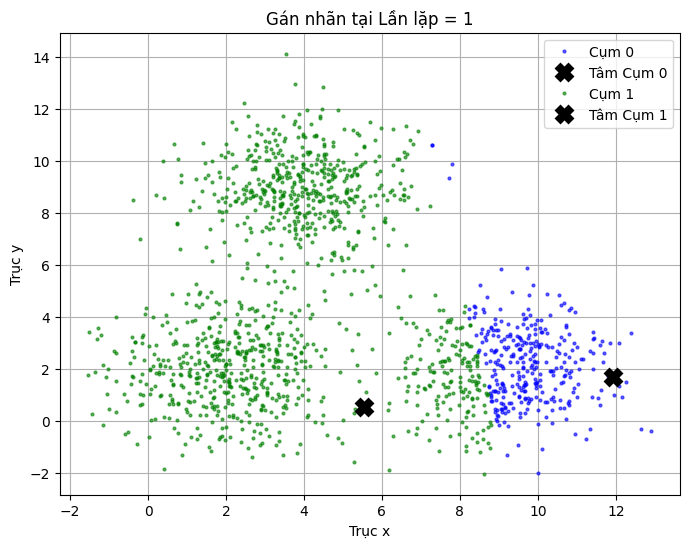

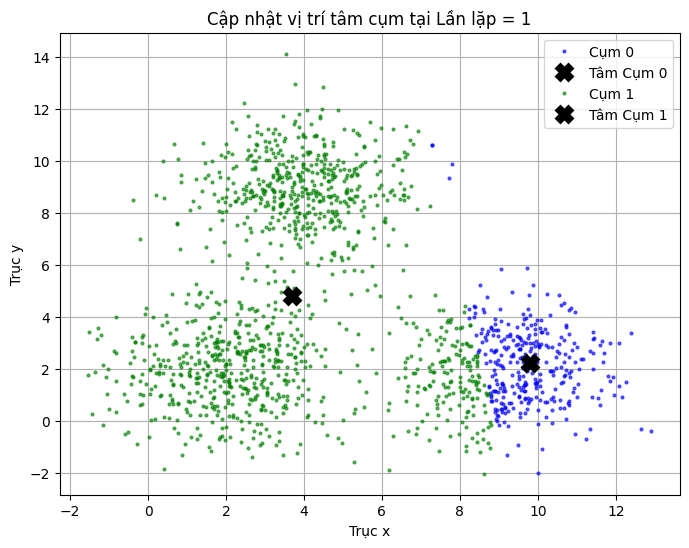

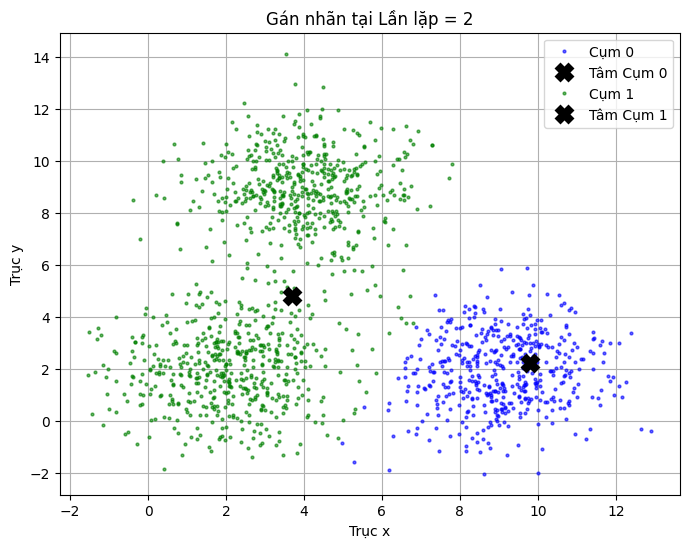

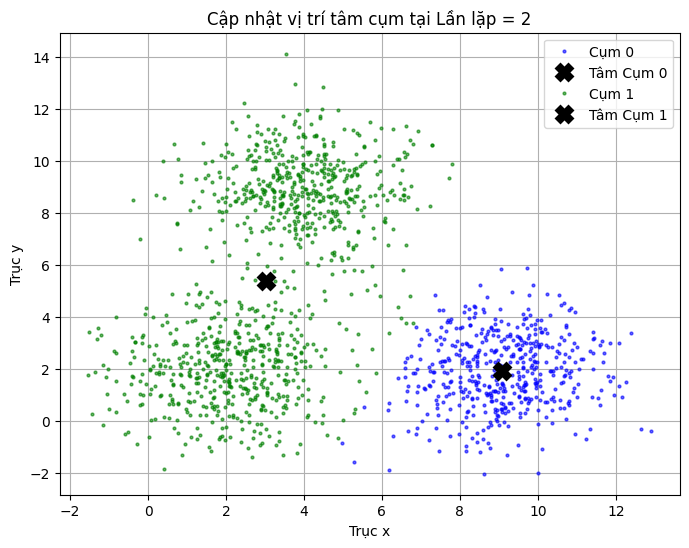

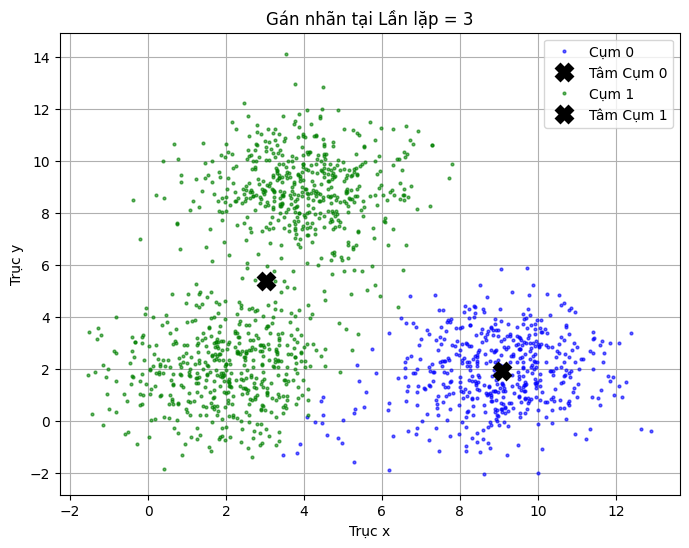

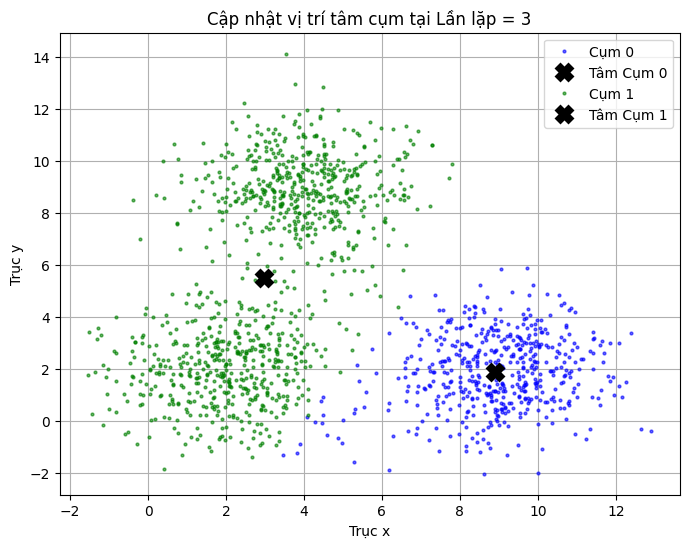

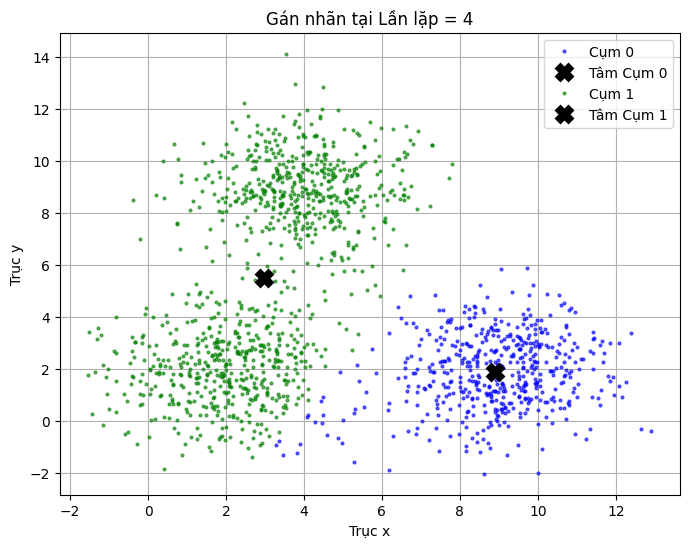

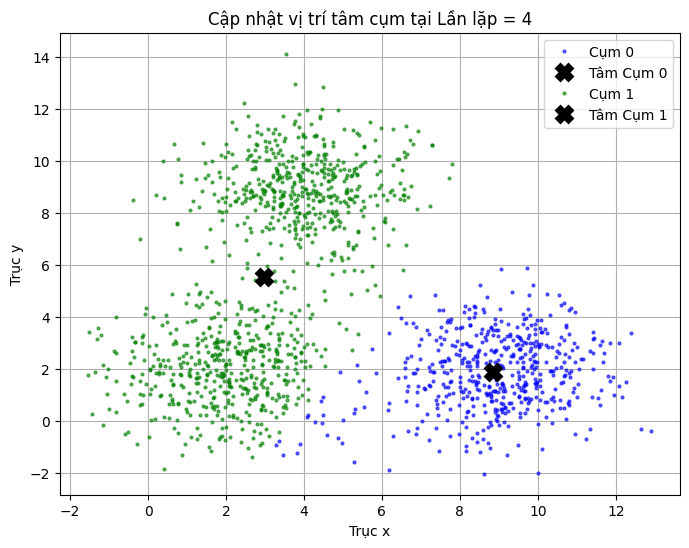

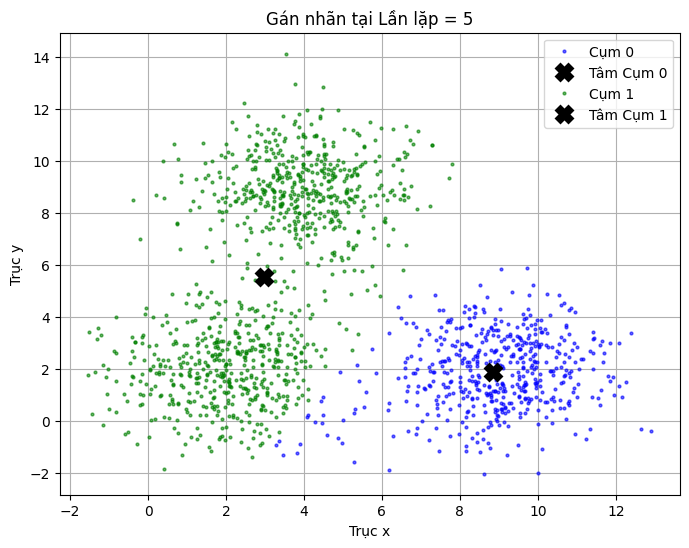

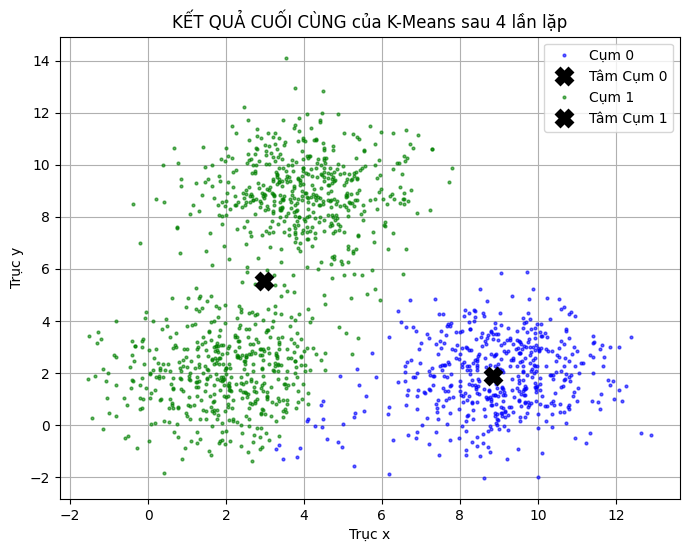

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import copy

# --- I. KHỐI TẠO VÀ NHẬN DỮ LIỆU ĐỘNG ---

def tao_du_lieu_mau(so_mau_moi_cum=500, so_cum=3):
    # Tác dụng Code: Tạo 3 cụm dữ liệu phân tán theo phân phối chuẩn (Gaussian).
    tam_ly_tuong = np.array([[2, 2], [9, 2], [4, 9]])
    ma_tran_hiep_phuong_sai = [[2, 0], [0, 2]]

    # Tạo dữ liệu ngẫu nhiên cho 3 cụm (3 * 500 = 1500 điểm)
    X0 = np.random.multivariate_normal(tam_ly_tuong[0], ma_tran_hiep_phuong_sai, so_mau_moi_cum)
    X1 = np.random.multivariate_normal(tam_ly_tuong[1], ma_tran_hiep_phuong_sai, so_mau_moi_cum)
    X2 = np.random.multivariate_normal(tam_ly_tuong[2], ma_tran_hiep_phuong_sai, so_mau_moi_cum)

    DuLieu = np.concatenate((X0, X1, X2), axis=0)
    return DuLieu, so_cum

def nhap_tham_so_chay():
    # Tác dụng Code: Lấy tham số Số Cụm (K) từ người dùng (Dynamic Input).
    while True:
        try:
            K = int(input("Nhập Số Cụm (K): "))
            if K > 0: break
            else: print("K phải lớn hơn 0.")
        except ValueError: print("Vui lòng nhập số nguyên.")
    return K

# --- II. CÁC HÀM CỐT LÕI CỦA THUẬT TOÁN K-MEANS ---

def khoi_tao_tam_cum(DuLieu, K):
    # Tác dụng Code: Chọn K tâm cụm khởi tạo ngẫu nhiên từ tập dữ liệu.
    # Dữ liệu Động 1: Tọa độ Tâm Cụm (Khởi tạo ngẫu nhiên)
    return DuLieu[np.random.choice(DuLieu.shape[0], K, replace=False)]

def gan_nhan(DuLieu, tam_cum):
    # Tác dụng Code: Gán nhãn cho từng điểm dữ liệu theo tâm cụm gần nhất (E-Step: Expectation).
    # Tính ma trận khoảng cách giữa mọi điểm (DuLieu) và mọi tâm (tam_cum)
    KhoangCach = cdist(DuLieu, tam_cum)
    # Dữ liệu Động 2: Nhãn (Label) của mỗi điểm dữ liệu (chỉ mục của khoảng cách nhỏ nhất)
    return np.argmin(KhoangCach, axis=1)

def cap_nhat_tam_cum(DuLieu, nhan, K):
    # Tác dụng Code: Tính toán lại vị trí mới của tâm cụm (M-Step: Maximization).
    tam_moi = np.zeros((K, DuLieu.shape[1]))
    # Dữ liệu Động 3: Tọa độ Tâm Cụm (Được cập nhật)
    for k in range(K):
        DuLieu_k = DuLieu[nhan == k, :] # Lấy tất cả các điểm thuộc cụm k
        if len(DuLieu_k) > 0:
            # Tâm mới là trung bình cộng tọa độ (Mean) của tất cả các điểm trong cụm đó.
            tam_moi[k, :] = np.mean(DuLieu_k, axis=0)
    return tam_moi

def k_means_algorithm(DuLieu, K, tam_khoi_tao):
    # Tác dụng Code: Thực thi thuật toán K-Means lặp lại cho đến khi hội tụ.
    tam_hien_tai = tam_khoi_tao
    so_lan_lap = 0

    while True:
        tam_cu = copy.deepcopy(tam_hien_tai) # Sao chép tâm cũ để kiểm tra hội tụ

        # 1. Gán nhãn (E-step)
        nhan_hien_tai = gan_nhan(DuLieu, tam_hien_tai)
        truc_quan_hoa(DuLieu, tam_hien_tai, nhan_hien_tai, K,
                     'Gán nhãn tại Lần lặp = ' + str(so_lan_lap + 1))

        # 2. Cập nhật tâm cụm (M-step)
        tam_moi = cap_nhat_tam_cum(DuLieu, nhan_hien_tai, K)

        # 3. Kiểm tra hội tụ (Tác dụng Code: Dừng khi các tâm không thay đổi vị trí)
        if np.allclose(tam_cu, tam_moi):
            break

        # 4. Cập nhật và trực quan hóa vị trí tâm cụm mới
        tam_hien_tai = tam_moi
        truc_quan_hoa(DuLieu, tam_hien_tai, nhan_hien_tai, K,
                     'Cập nhật vị trí tâm cụm tại Lần lặp = ' + str(so_lan_lap + 1))

        so_lan_lap += 1

    return (tam_hien_tai, nhan_hien_tai, so_lan_lap)

# --- III. HÀM TRỰC QUAN HÓA ---

def truc_quan_hoa(DuLieu, tam_cum, nhan, K, tieu_de):
    # Tác dụng Code: Vẽ dữ liệu (theo cụm) và tâm cụm lên đồ thị, thể hiện sự thay đổi qua mỗi bước lặp.
    mau_sac = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange']

    plt.figure(figsize=(8, 6))
    plt.xlabel('Trục x')
    plt.ylabel('Trục y')
    plt.title(tieu_de)

    # Dữ liệu Động 4: Các màu sắc và ký hiệu (thay đổi theo nhãn và K)
    for i in range(K):
        du_lieu_cum_i = DuLieu[nhan == i]
        # Vẽ điểm dữ liệu (dấu chấm)
        plt.plot(du_lieu_cum_i[:, 0], du_lieu_cum_i[:, 1], mau_sac[i % len(mau_sac)] + '.', markersize=4,
                 alpha=0.6, label='Cụm ' + str(i))

        # Vẽ tâm cụm (ký hiệu X màu đen)
        plt.plot(tam_cum[i][0], tam_cum[i][1], 'kX',
                 markersize=12, markeredgewidth=2,
                 label='Tâm Cụm ' + str(i))

    plt.legend()
    plt.grid(True)
    plt.show()

# --- IV. KHỐI THỰC THI CHÍNH ---

if __name__ == "__main__":

    # 1. Tạo dữ liệu ban đầu
    DuLieu, so_cum_mau = tao_du_lieu_mau()

    # 2. Lấy tham số K từ người dùng (Dynamic Input)
    so_cum = nhap_tham_so_chay()

    # 3. Khởi tạo tâm cụm (Dữ liệu Động 1)
    tam_khoi_tao = khoi_tao_tam_cum(DuLieu, so_cum)

    # 4. Trực quan hóa bước khởi tạo (Dữ liệu Động 2)
    nhan_khoi_tao = gan_nhan(DuLieu, tam_khoi_tao)
    truc_quan_hoa(DuLieu, tam_khoi_tao, nhan_khoi_tao, so_cum,
                  'Khởi tạo Tâm Cụm và gán nhãn lần đầu')

    # 5. Chạy thuật toán K-Means
    tam_cuoi, nhan_cuoi, so_lan_lap_cuoi = k_means_algorithm(DuLieu, so_cum, tam_khoi_tao)

    # 6. Trực quan hóa kết quả cuối cùng
    truc_quan_hoa(DuLieu, tam_cuoi, nhan_cuoi, so_cum,
                 'KẾT QUẢ CUỐI CÙNG của K-Means sau ' + str(so_lan_lap_cuoi) + ' lần lặp')

--- I. TAO DU LIEU VA CHIA TAP HOP ---

--- II. LUA CHON K THU CONG (GIOI HAN TOI DA 11) ---
Nhap gia tri K thu cong (lon hon 0, toi da 11): 4

Nhap toa do X (Dac trung 1) cho diem moi: 2
Nhap toa do Y (Dac trung 2) cho diem moi: 5

--- IV. DU DOAN VOI HAM THU CONG ---
Diem kiem tra: [2. 5.]
Gia tri K duoc su dung (Thap hon hoac bang 11): 4
Nhan du doan cho diem du lieu moi la: 1


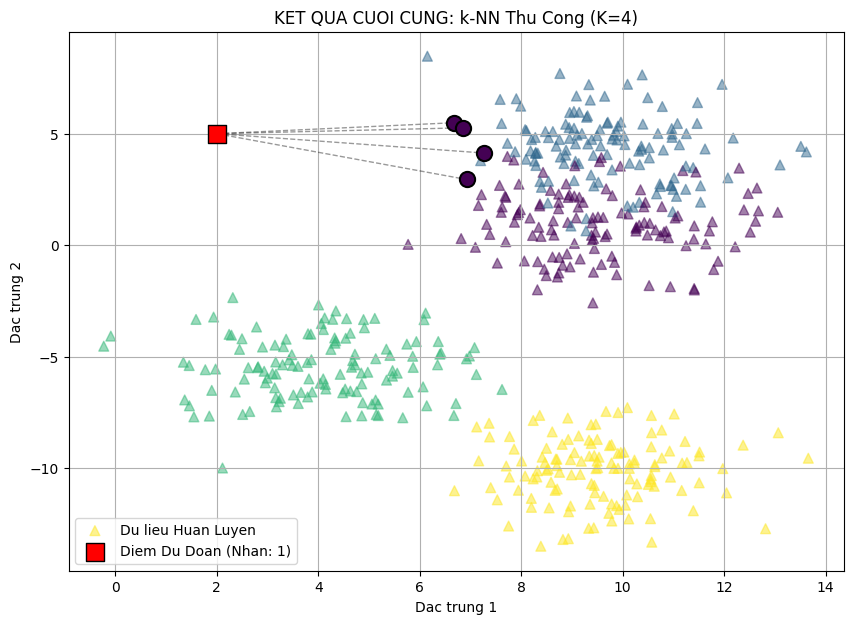

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
import sys

# Tắt cảnh báo về hiệu suất của GridSearch (giữ lại phòng khi phát triển thêm)
warnings.filterwarnings("ignore")

# --- I. TẠO DỮ LIỆU BAN ĐẦU VÀ CHIA TẬP HỢP ---

# Tác dụng Code: Khởi tạo dữ liệu mẫu với độ phân tán (nhiễu) vừa phải
DuLieu_X, Nhan_y = make_blobs(n_samples=100, n_features=2, centers=4,
                              cluster_std=1.5,
                              random_state=4)
# Dữ liệu Động 1: Tập dữ liệu (X) và Nhãn (y) gốc (100 mẫu)

print("--- I. TẠO DỮ LIỆU VÀ CHIA TẬP HỢP ---")

# Tác dụng Code: Chia dữ liệu thành tập Huấn luyện (75%) và Kiểm tra (25%)
X_HuanLuyen, X_KiemTra, y_HuanLuyen, y_KiemTra = train_test_split(
    DuLieu_X, Nhan_y, test_size=0.25, random_state=0)

# --- II. LỰA CHỌN K THỦ CÔNG VÀ GIỚI HẠN ---

# Giới hạn K: Đặt K tối đa là 11 để đảm bảo K không quá lớn
K_LIMIT = 11

print(f"\n--- II. LỰA CHỌN K THỦ CÔNG (GIỚI HẠN TỐI ĐA {K_LIMIT}) ---")

k_valid = False
# Dữ liệu Động 2: Vòng lặp nhận K thủ công và kiểm tra tính hợp lệ
while not k_valid:
    try:
        # Nhập K thủ công
        k_thu_cong = int(input(f"Nhập giá trị K thủ công (lớn hơn 0, tối đa {K_LIMIT}): "))

        if k_thu_cong < 1:
            print("K phải lớn hơn hoặc bằng 1. Thử lại.")
        elif k_thu_cong > K_LIMIT:
            # Tác dụng Code: Áp đặt giới hạn K để tránh mô hình quá mềm dẻo (overfitting)
            print(f"K không được vượt quá giới hạn tối đa K={K_LIMIT} (giới hạn của mô hình). Thử lại.")
        else:
            k_valid = True
    except ValueError:
        print("Nhập không hợp lệ. Hãy nhập một số nguyên.")

# Giá trị K được sử dụng cho toàn bộ quá trình: k_thu_cong

# --- III. PHÂN LOẠI K-NN THỦ CÔNG (Core Logic) ---

def PhanLoai_KNN(X_HuanLuyen, X_KiemTra, y_HuanLuyen, k):
    """ Tác dụng Code: Thực hiện phân loại k-NN thủ công (Tìm K hàng xóm và Bầu chọn). """
    nhan_du_doan = []
    for i in range(X_KiemTra.shape[0]):
        distances = []
        # 1. Tính khoảng cách Euclidean đến mọi điểm huấn luyện
        for j in range(X_HuanLuyen.shape[0]):
            # Dữ liệu Động 4: Khoảng cách Euclidean (Tính toán Động)
            dist = np.sqrt(np.sum(np.power(X_KiemTra[i, :] - X_HuanLuyen[j, :], 2)))
            distances.append((dist, y_HuanLuyen[j]))
        distances.sort(key=lambda x: x[0])
        top_k_hang_xom = distances[:k] # 2. Chọn K hàng xóm gần nhất
        dem_lop = {}
        for _, nhan in top_k_hang_xom:
            nhan = int(nhan)
            # Dữ liệu Động 5: Phiếu bầu của từng lớp (Kết quả Động)
            dem_lop[nhan] = dem_lop.get(nhan, 0) + 1
        # 3. Chọn lớp có số phiếu bầu cao nhất
        nhan_du_doan.append(max(dem_lop, key=dem_lop.get))
    return np.array(nhan_du_doan)

# --- IV. KIỂM TRA HÀM THỦ CÔNG VÀ TRỰC QUAN HÓA KẾT QUẢ CUỐI CÙNG ---

# Tạo tập dữ liệu huấn luyện lớn hơn (500 mẫu) để minh họa
X_lon, y_lon = make_blobs(n_samples=500, n_features=2, centers=4,
                              cluster_std=1.5, random_state=4)

# Dữ liệu Động 6: Điểm dữ liệu mới cần dự đoán (Dynamic Test Point)
try:
    x_moi = float(input("\nNhập tọa độ X (Đặc trưng 1) cho điểm mới: "))
    y_moi = float(input("Nhập tọa độ Y (Đặc trưng 2) cho điểm mới: "))
    Diem_Moi = np.array([[x_moi, y_moi]])
except ValueError:
    Diem_Moi = np.array([[1.5, 5.0]]) # Giá trị mặc định nếu nhập sai

# Tác dụng Code: Thực hiện dự đoán bằng hàm thủ công với K=k_thu_cong
ket_qua = PhanLoai_KNN(X_lon, Diem_Moi, y_lon, k=k_thu_cong)

print("\n--- IV. DỰ ĐOÁN VỚI HÀM THỦ CÔNG ---")
print(f"Điểm kiểm tra: {Diem_Moi[0]}")
print(f"Giá trị K được sử dụng (Thấp hơn hoặc bằng {K_LIMIT}): {k_thu_cong}")
print("Nhãn dự đoán cho điểm dữ liệu mới là:", ket_qua[0])

# Truc quan hoa diem du doan va cac hang xom gan nhat
plt.figure(figsize=(10, 7))

# 1. Vẽ tập huấn luyện (Tăng kích thước điểm huấn luyện)
plt.scatter(X_lon[:, 0], X_lon[:, 1], c=y_lon, marker='^', s=50, alpha=0.5, cmap='viridis', label='Dữ liệu Huấn Luyện')

# 2. Tìm và vẽ k hàng xóm gần nhất (Logic phụ trợ cho trực quan hóa)
distances_to_new_point = []
for j in range(X_lon.shape[0]):
    dist = np.sqrt(np.sum(np.power(Diem_Moi[0, :] - X_lon[j, :], 2)))
    distances_to_new_point.append((dist, X_lon[j, :], y_lon[j]))

distances_to_new_point.sort(key=lambda x: x[0])
top_k_neighbors = distances_to_new_point[:k_thu_cong]

# Vẽ các điểm hàng xóm gần nhất
# Dữ liệu Động 7: Tọa độ và màu sắc của K hàng xóm được chọn
for _, coords, nhan in top_k_neighbors:
    # Vẽ đường nối từ điểm mới đến hàng xóm
    plt.plot([Diem_Moi[0, 0], coords[0]], [Diem_Moi[0, 1], coords[1]], 'k--', alpha=0.4, linewidth=1)

    # Vẽ chính điểm hàng xóm (viền đen, màu chính xác)
    plt.scatter(coords[0], coords[1], c=[nhan], marker='o', s=120, edgecolors='black', linewidths=1.5, cmap='viridis', zorder=4)

# 3. Vẽ điểm mới (điểm kiểm tra)
nhan_du_doan_moi = ket_qua[0]
plt.scatter(Diem_Moi[:, 0], Diem_Moi[:, 1], c='red', marker='s', s=180, edgecolors='black', label=f'Điểm Dự Đoán (Nhãn: {nhan_du_doan_moi})', zorder=5)

# Chú thích
plt.title(f'KẾT QUẢ CUỐI CÙNG: k-NN Thủ Công (K={k_thu_cong})')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.legend(loc='lower left')
plt.grid(True)
plt.show() # HIỂN THỊ SƠ ĐỒ CUỐI CÙNG